In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('gpt_spa_to_eng.csv')

In [16]:
df.head()

,Original,gpt4,Original_NEU,Original_NEG,Original_POS,gpt4_NEU,gpt4_NEG,gpt4_POS
0,"¿Cómo estás, soy turbulent? Y yo la burrita bu...","How are you, am I turbulent? And I the little ...",0.612038,0.375407,0.012556,0.150018,0.641487,0.208495
1,Son largas y aparte esta esta mención es. Para...,The seasons are long and besides this mention ...,0.310165,0.511624,0.178211,0.001756,0.019263,0.978982
2,Y han pasado personas muy importantes por esta...,And very important people have passed through ...,0.808546,0.185225,0.006229,0.533023,0.459934,0.007042
3,Ciclo formal y a partir de aquí el podcast del...,A formal cycle and from here the podcast of th...,0.587000,0.402197,0.010803,0.299618,0.641958,0.058424
4,Pero hay que aclarar que obviamente seguiremos...,But we must clarify that obviously we will con...,0.004094,0.105816,0.890090,0.001452,0.203300,0.795249


In [17]:
ordered_columns = ['Original', 'gpt4',
                   'Original_POS', 'gpt4_POS', 
                   'Original_NEU', 'gpt4_NEU', 
                   'Original_NEG', 'gpt4_NEG']

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]

In [18]:
# Find the index of the maximum sentiment score for each row for original sentiments
df['original_highest_sent'] = df[['Original_POS', 'Original_NEU', 'Original_NEG']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for GPT-4 sentiments
df['gpt4_highest_sent'] = df[['gpt4_POS', 'gpt4_NEU', 'gpt4_NEG']].idxmax(axis=1)

In [19]:
# Remove the prefix "Original_" from each entry in the 'original_highest_sent' column
df['original_highest_sent'] = df['original_highest_sent'].str.replace('Original_', '')

# Remove the prefix "gpt4_" from each entry in the 'gpt4_highest_sent' column
df['gpt4_highest_sent'] = df['gpt4_highest_sent'].str.replace('gpt4_', '')

In [20]:
# Calculate the number of matching values between original and GPT-4 sentiments
matching_count = (df['original_highest_sent'] == df['gpt4_highest_sent']).sum()
matching_count

852

In [9]:
df

,Original,gpt4,Original_POS,gpt4_POS,Original_NEU,gpt4_NEU,Original_NEG,gpt4_NEG,original_highest_sent,gpt4_highest_sent
0,"¿Cómo estás, soy turbulent? Y yo la burrita bu...","How are you, am I turbulent? And I the little ...",0.012556,0.208495,0.612038,0.150018,0.375407,0.641487,NEU,NEG
1,Son largas y aparte esta esta mención es. Para...,The seasons are long and besides this mention ...,0.178211,0.978982,0.310165,0.001756,0.511624,0.019263,NEG,POS
2,Y han pasado personas muy importantes por esta...,And very important people have passed through ...,0.006229,0.007042,0.808546,0.533023,0.185225,0.459934,NEU,NEU
3,Ciclo formal y a partir de aquí el podcast del...,A formal cycle and from here the podcast of th...,0.010803,0.058424,0.587000,0.299618,0.402197,0.641958,NEU,NEG
4,Pero hay que aclarar que obviamente seguiremos...,But we must clarify that obviously we will con...,0.890090,0.795249,0.004094,0.001452,0.105816,0.203300,POS,POS
...,...,...,...,...,...,...,...,...,...,...
1233,"Bueno, en esta zona pasa lo mismo y se dice es...","Well, the same thing happens in this area and ...",0.026308,0.028937,0.340978,0.036207,0.632714,0.934856,NEG,NEG
1234,"La noa, que es la organización nacional Ocean ...","NOAA, which is the National Ocean Service, say...",0.059387,0.037406,0.390777,0.013812,0.549836,0.948782,NEG,NEG
1235,Hizo una lista de las zonas marítimas más peli...,Made a list of the most dangerous maritime zon...,0.014125,0.010203,0.613403,0.603736,0.372471,0.386060,NEU,NEU
1236,Y en realidad el barco había salido con una to...,"And in reality, the ship had left during a sto...",0.069381,0.109847,0.076158,0.028641,0.854461,0.861512,NEG,NEG


In [21]:
# Create a new DataFrame with the mismatched sentiments, preserving the index
df_mismatches = df[df['original_highest_sent'] != df['gpt4_highest_sent']].copy()
df_mismatches

,Original,gpt4,Original_POS,gpt4_POS,Original_NEU,gpt4_NEU,Original_NEG,gpt4_NEG,original_highest_sent,gpt4_highest_sent
0,"¿Cómo estás, soy turbulent? Y yo la burrita bu...","How are you, am I turbulent? And I the little ...",0.012556,0.208495,0.612038,0.150018,0.375407,0.641487,NEU,NEG
1,Son largas y aparte esta esta mención es. Para...,The seasons are long and besides this mention ...,0.178211,0.978982,0.310165,0.001756,0.511624,0.019263,NEG,POS
3,Ciclo formal y a partir de aquí el podcast del...,A formal cycle and from here the podcast of th...,0.010803,0.058424,0.587000,0.299618,0.402197,0.641958,NEU,NEG
6,"¿De hecho una de las reglas, cuando llega aquí...","Indeed one of the rules, when our guest arrive...",0.023425,0.432165,0.545202,0.007643,0.431373,0.560192,NEU,NEG
7,Traca traca y eso ya no se debe de hacer. Yo n...,Snap snap and that should no longer be done. I...,0.017988,0.022933,0.757546,0.353032,0.224466,0.624035,NEU,NEG
...,...,...,...,...,...,...,...,...,...,...
1215,"El artículo, un poco dramático, se llamaba el ...","The article, a bit dramatic, was called the de...",0.023067,0.032755,0.509421,0.126474,0.467512,0.840771,NEU,NEG
1217,La primera explicación es que supuestamente. E...,"The first explanation is that supposedly, in t...",0.013347,0.036036,0.536477,0.038535,0.450176,0.925429,NEU,NEG
1219,Una de las teorías que sí decían en el libro d...,One of the theories mentioned in Berlitz's boo...,0.017205,0.012454,0.706609,0.286331,0.276186,0.701215,NEU,NEG
1224,Es que justamente es que justamente el triángu...,The thing is that the Bermuda Triangle is one ...,0.641230,0.020607,0.018265,0.052514,0.340506,0.926879,POS,NEG


##Descriptive Statistics

In [11]:
from scipy import stats

# Calculate the differences
df['diff_POS'] = df['gpt4_POS'] - df['Original_POS']
df['diff_NEU'] = df['gpt4_NEU'] - df['Original_NEU']
df['diff_NEG'] = df['gpt4_NEG'] - df['Original_NEG']

# Descriptive statistics
descriptive_stats = df[['diff_POS', 'diff_NEU', 'diff_NEG']].describe()

print("Descriptive Statistics for Differences:")
descriptive_stats

Descriptive Statistics for Differences:


,diff_POS,diff_NEU,diff_NEG
count,1238.000000,1238.000000,1238.000000
mean,0.054203,-0.089626,0.035424
std,0.217638,0.255765,0.282763
min,-0.705379,-0.839394,-0.853765
25%,-0.015836,-0.207088,-0.111219
50%,0.001437,-0.033611,0.021192
75%,0.080379,0.001274,0.208159
max,0.957314,0.888855,0.763696


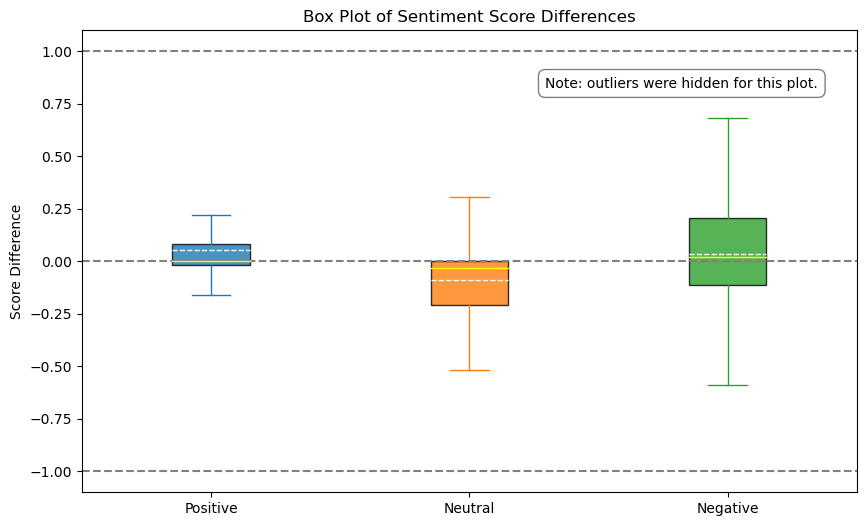

In [13]:
# Define the colors for each sentiment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for POS, orange for NEU, green for NEG

# Create box plots with custom colors and mean line, and hide outliers
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df['diff_POS'], df['diff_NEU'], df['diff_NEG']], labels=['Positive', 'Neutral', 'Negative'],
                 patch_artist=True, showmeans=True, meanline=True, showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Set the properties of the boxplot elements
for i, color in enumerate(colors):
    plt.setp(bp['boxes'][i], facecolor=color, alpha=0.8)
    plt.setp(bp['whiskers'][2*i:2*i+2], color=color)
    plt.setp(bp['caps'][2*i:2*i+2], color=color)
    # As outliers are hidden, no need to set fliers properties
    plt.setp(bp['means'][i], color='white')
    plt.setp(bp['medians'][i], color='yellow')

plt.title('Box Plot of Sentiment Score Differences')
plt.ylabel('Score Difference')
plt.show()


In [15]:
from scipy.stats import ttest_rel

# Conduct paired t-tests
t_test_POS = ttest_rel(df['gpt4_POS'], df['Original_POS'])
t_test_NEU = ttest_rel(df['gpt4_NEU'], df['Original_NEU'])
t_test_NEG = ttest_rel(df['gpt4_NEG'], df['Original_NEG'])

alpha = 0.05

# Conduct paired t-tests and filter results based on significance level
t_test_POS = ttest_rel(df['gpt4_POS'], df['Original_POS'])
if t_test_POS.pvalue < alpha:
    print(f"Paired T-Test for POS is significant: statistic={t_test_POS.statistic}, p-value={t_test_POS.pvalue}")
else:
    print(f"Paired T-Test for POS there is not significant: p-value={t_test_POS.pvalue}")

t_test_NEU = ttest_rel(df['gpt4_NEU'], df['Original_NEU'])
if t_test_NEU.pvalue < alpha:
    print(f"Paired T-Test for NEU is significant: statistic={t_test_NEU.statistic}, p-value={t_test_NEU.pvalue}")
else:
    print(f"Paired T-Test for NEU is not significant: p-value={t_test_NEU.pvalue}")

t_test_NEG = ttest_rel(df['gpt4_NEG'], df['Original_NEG'])
if t_test_NEG.pvalue < alpha:
    print(f"Paired T-Test for NEG is significant: statistic={t_test_NEG.statistic}, p-value={t_test_NEG.pvalue}")
else:
    print(f"Paired T-Test for NEG is not significant: p-value={t_test_NEG.pvalue}")

Paired T-Test for POS is significant: statistic=8.762856334966752, p-value=6.160959400023575e-18
Paired T-Test for NEU is significant: statistic=-12.329715649471675, p-value=4.9928613537296535e-33
Paired T-Test for NEG is significant: statistic=4.407878583369384, p-value=1.134394734366279e-05


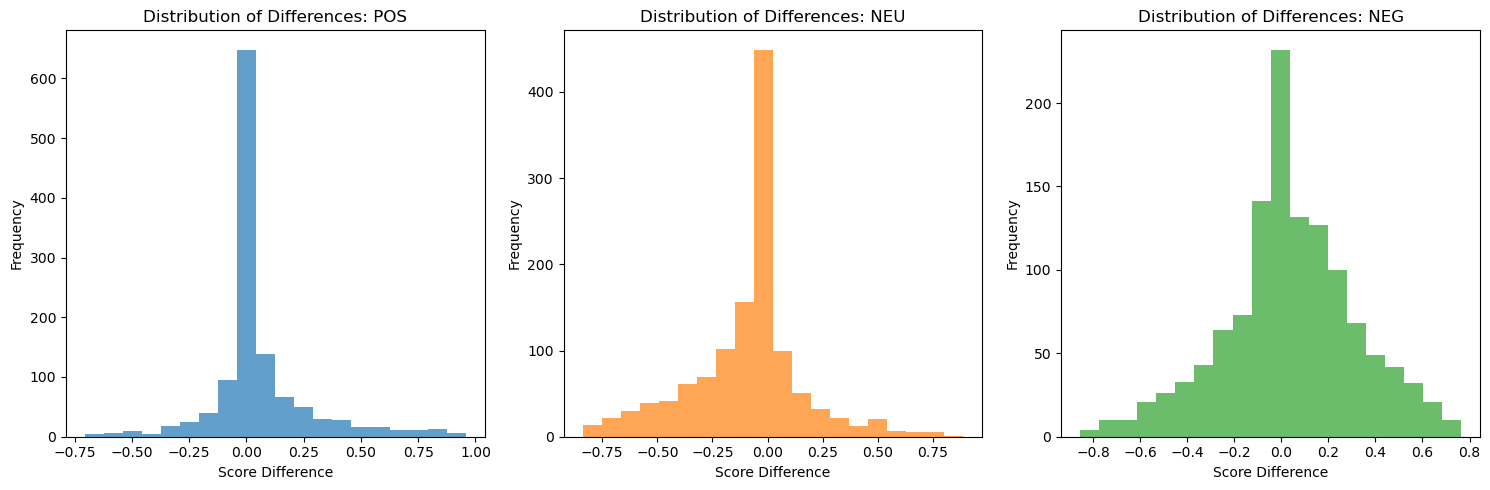

In [16]:
# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].hist(df[f'diff_{sentiment}'], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Distribution of Differences: {sentiment}')
    axes[i].set_xlabel('Score Difference')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

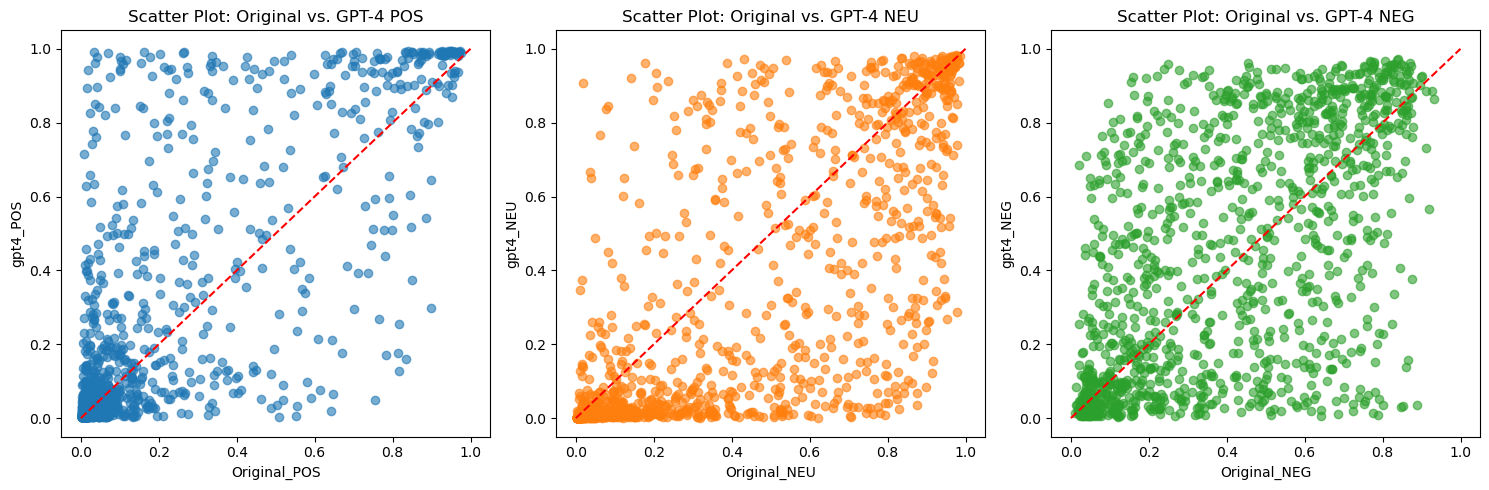

In [17]:
# Plot scatter plots with a line of equality
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].scatter(df[f'Original_{sentiment}'], df[f'gpt4_{sentiment}'],color=colors[i], alpha=0.6)
    axes[i].plot([0, 1], [0, 1], 'r--')  # Line of equality
    axes[i].set_title(f'Scatter Plot: Original vs. GPT-4 {sentiment}')
    axes[i].set_xlabel(f'Original_{sentiment}')
    axes[i].set_ylabel(f'gpt4_{sentiment}')

plt.tight_layout()
plt.show()
